In [4]:
#load aiida environment and connect to database
from aiida import load_profile

profile = load_profile()
print('profile name : ',profile.name)
print('profile database host name : ',profile.database_hostname)
print('default user : ',profile.default_user)

profile name :  default
profile database host name :  localhost
default user :  r.mozumder@fz-juelich.de


In [112]:
# load classes and functions
from aiida.orm import CifData, Code, Dict, load_node, StructureData 
from aiida.orm import (Group, load_group, load_node, load_code, groups,
                      WorkChainNode)
from aiida.engine import submit
from aiida.common.exceptions import NotExistent
from aiida_kkr.workflows import kkr_imp_sub_wc, kkr_imp_dos, kkr_imp_wc, kkr_startpot_wc
import numpy as np
from aiida_kkr.calculations import KkrimpCalculation, VoronoiCalculation
import matplotlib.pyplot as plt
from aiida_kkr.tools.common_workfunctions import get_username
import matplotlib.gridspec as gridspec
from aiida_kkr.tools import plot_kkr


Sc:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 21, 'ilayer_center': 3}
Ti:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 22, 'ilayer_center': 3}
V:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 23, 'ilayer_center': 3}
Cr:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 24, 'ilayer_center': 3}
Mn:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 25, 'ilayer_center': 3}
Fe:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 26, 'ilayer_center': 3}
Co:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 27, 'ilayer_center': 3}
Ni:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 28, 'ilayer_center': 3}
Zn:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 30, 'ilayer_center': 3}
Y:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 39, 'ilayer_center': 3}
Zr:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 40, 'ilayer_center': 3}
Mo:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 42, 'ilayer_center': 3}
Nb:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 41, 'ilayer_center': 3}
Cu:Bi2Te3dos
impurity_dict {'Rcut': 4.0, 'Zimp': 29, 

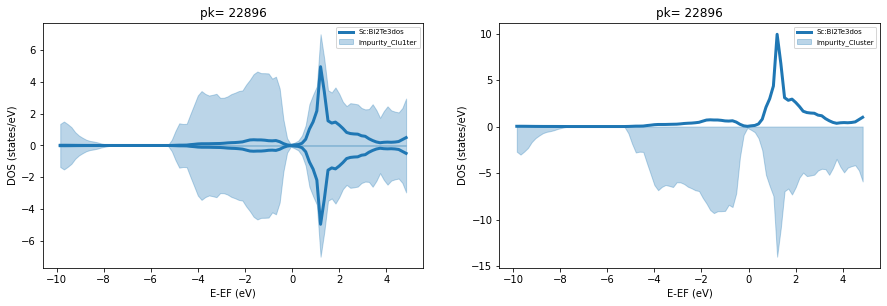

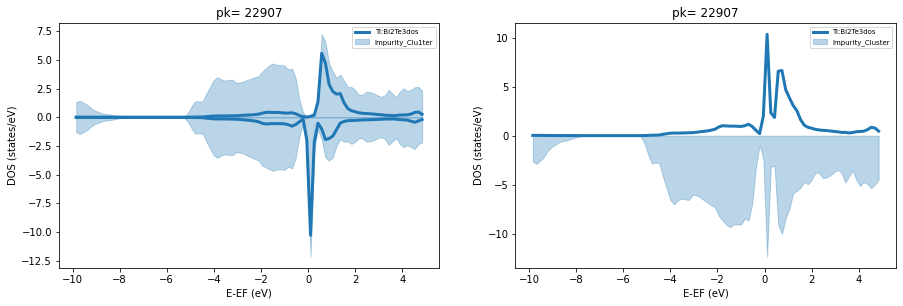

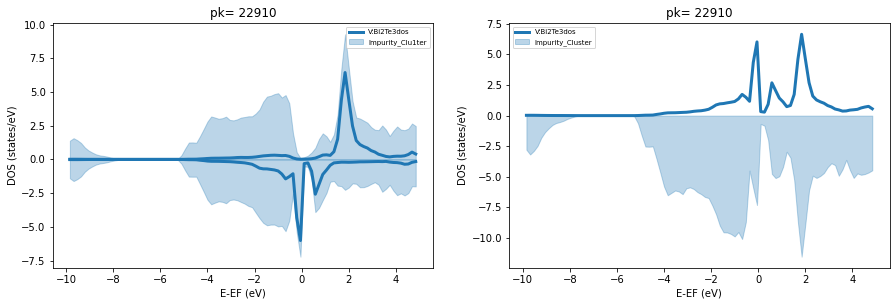

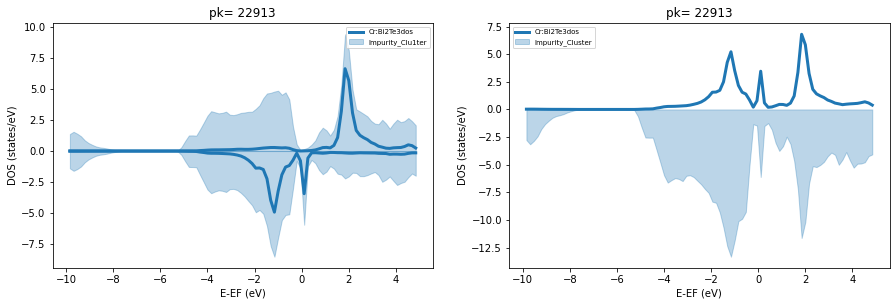

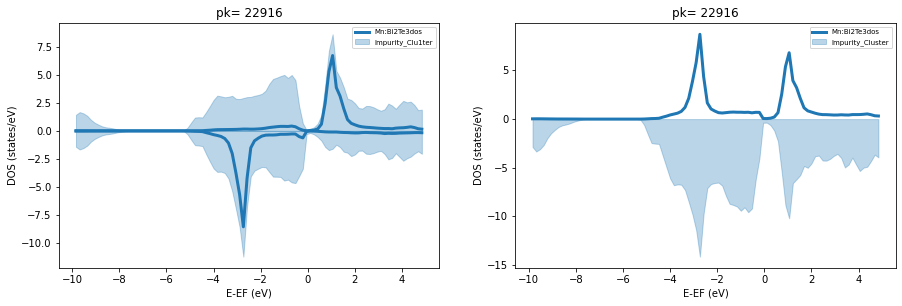

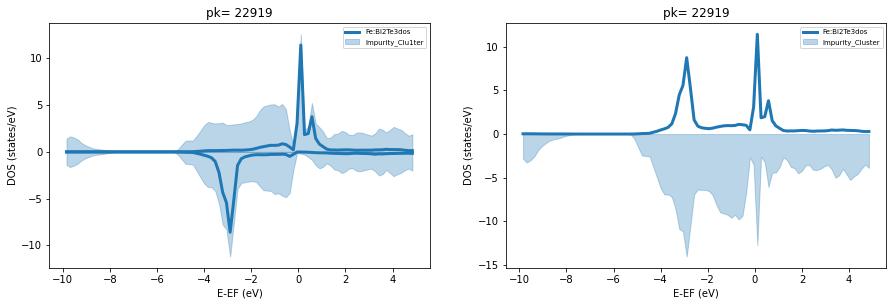

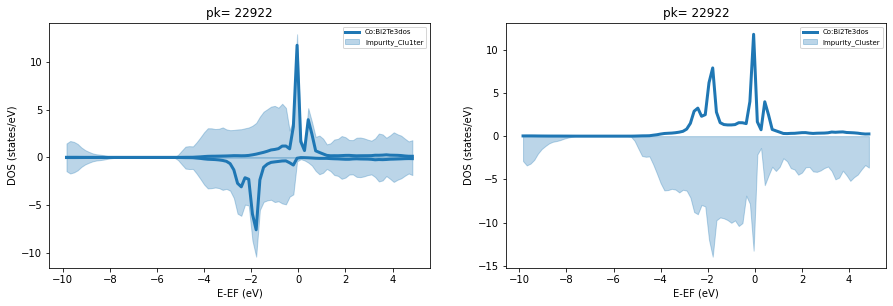

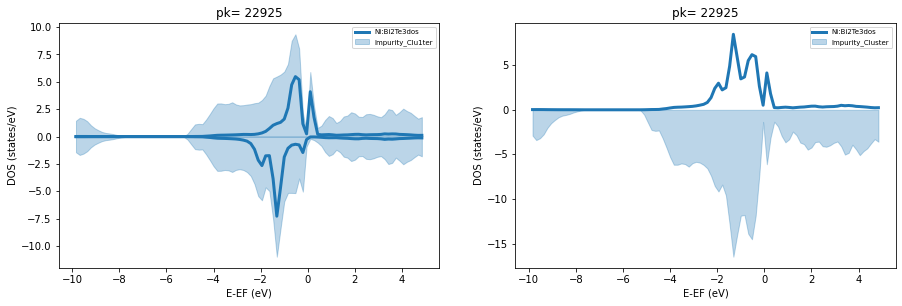

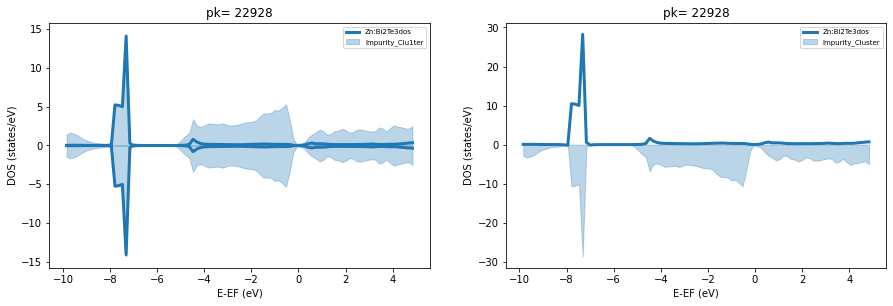

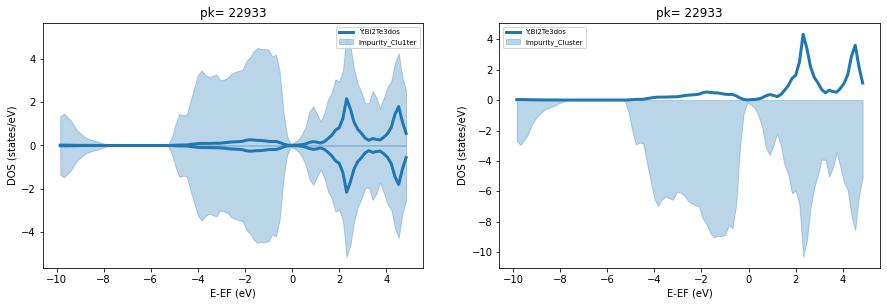

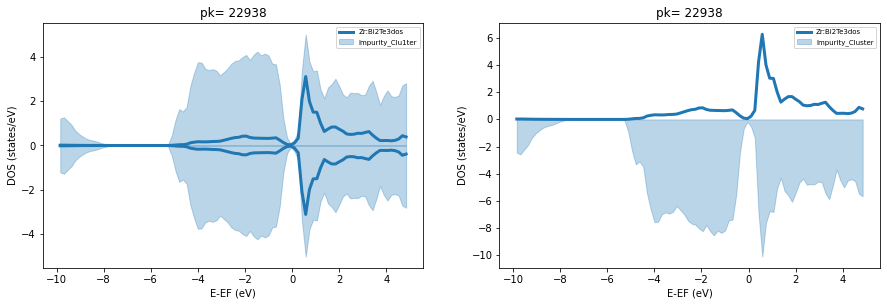

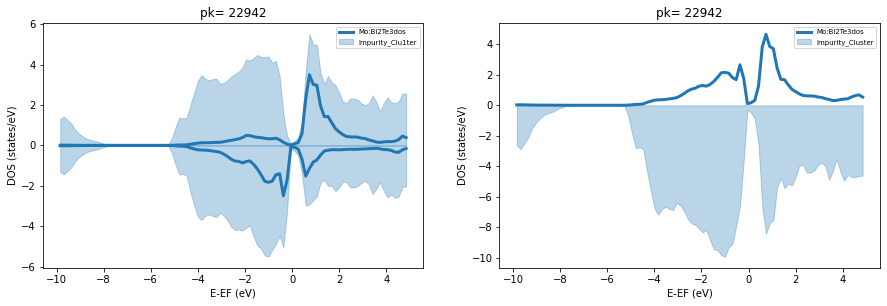

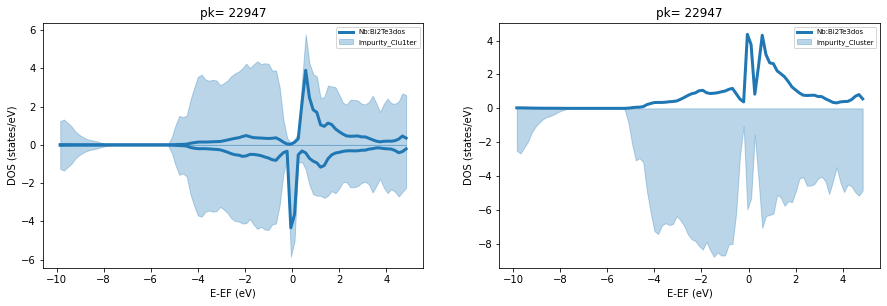

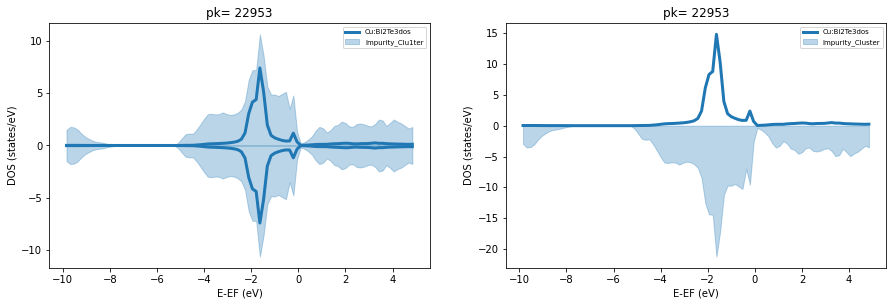

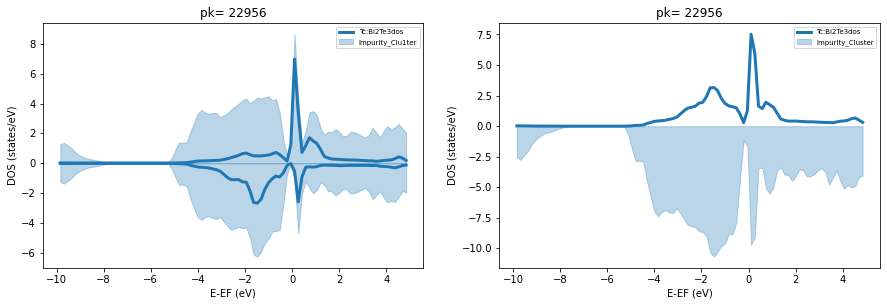

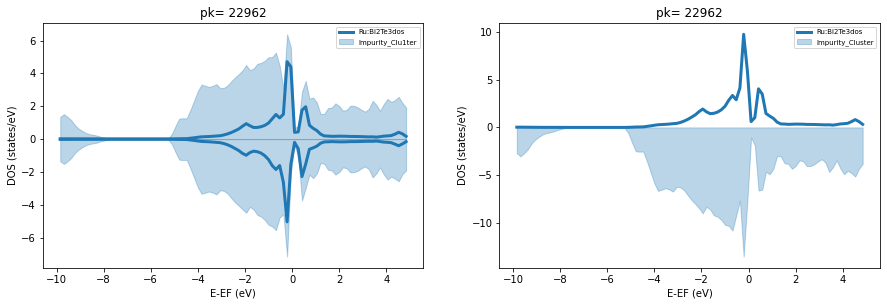

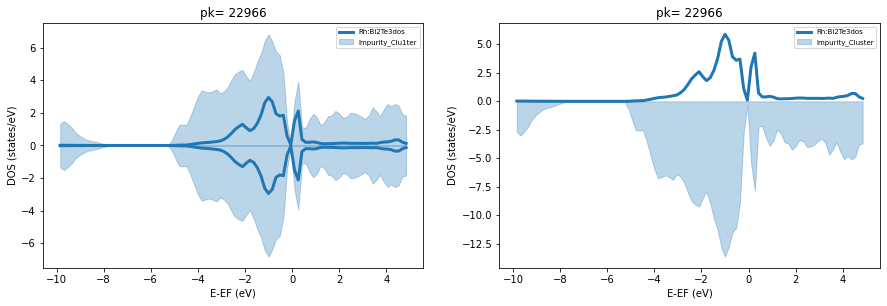

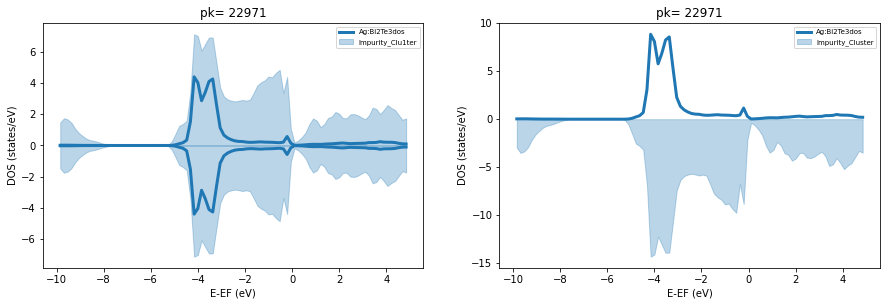

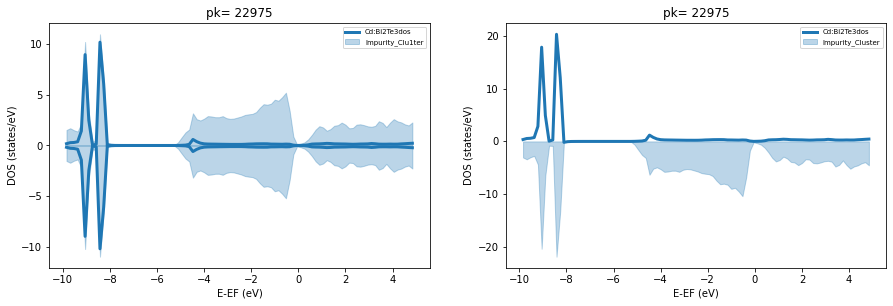

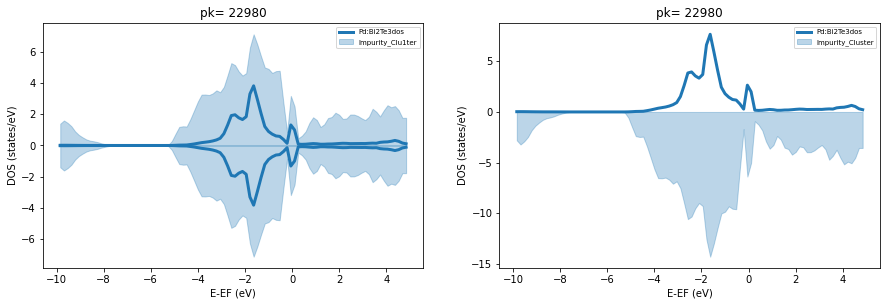

In [32]:
## This function will help to plot 
def dos_plot (group_or_wc_list):
    from aiida.orm import load_group, load_node
    if group_or_wc_list == []:
        dos_list= group_or_wc_list
    else:
        try:
            group = load_group(group_or_wc_list)
            dos_list = [i.pk for i in list(group.nodes)[:]]
        except:
            print('{} group is not present is the database.'.format(group_or_wc_list))
   
    for wc in dos_list[:]:
        imp_dos = load_node(wc)
        imp_info = imp_dos.label
        print(imp_info)


        fig2 = plt.figure(figsize=(15.0,4.5))
        spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig2)

        

        # Total contribution from the entire impurity cluster
        f2_ax1 = fig2.add_subplot(spec2[0, 0])
        plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True ,label= 'Impurity_Clu1ter',
                     noshow=True, nofig=True, color='C'+str(0), filled=True, alpha=0.3, yscale=1
                )
        # highlight the contibution of the impurity (iatom=0)
        plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label= imp_dos.label,
                     noshow=True, nofig=True, color='C'+str(0), lw=3, iatom=0, 
                )
        
            

        f2_ax2 = fig2.add_subplot(spec2[0, 1])
        plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label='Impurity_Cluster',
                noshow=True, nofig=True, color='C'+str(0),filled=True, alpha=0.3, yscale=1, sum_spins= True,)
        plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=imp_dos.label,
                noshow=True, nofig=True, color='C'+str(0), lw=3, iatom=0,all_atoms= False, sum_spins= True,)
        print('impurity_dict', imp_dos.inputs.impurity_info.get_dict())
        
        
        
## execution of the function
# dos_plot(94)

In [106]:
import numpy as np
group = load_group(94)
node_1 = list(group.nodes)[0]
print(node_1.pk)
dos_data = (node_1.outputs.dos_data)
# print(node_1.outputs.last_calc_output_parameters.get_dict())#['magnetism_group']
x_label, x_data, x_unit = list(dos_data.get_x())
y_total = dos_data.get_y()[0]
lst = x_data[0][:]

22896


In [102]:
ll = min(range(len(lst)), key = lambda i: abs(lst[i]-0.0))

len(y_total[:][0])
# print(y_total[1][0][:], len(y_total[1][0][:]), y_total[1][:][0], len(y_total[1][:][0]))
print('x_data shape : ',x_data.shape)
print('y_data shape : ',y_total[1].shape)

x_data shape :  (30, 96)
y_data shape :  (30, 96)


In [121]:
x = x_data[1][:]
y_data = (y_total[1])
y =  y_data[-1][:]+y_data[-1][:]


(-10.0, 10.0)

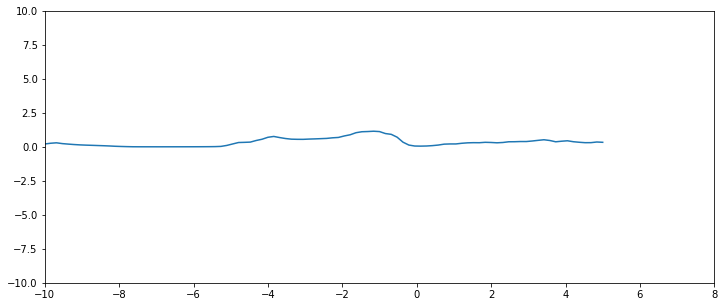

In [122]:
# To create a figure with the label '<GroupNum:GroupEntry> number'
plt.figure(num='94:0', figsize=(12.0, 5.0))
plt.plot(x,y)
plt.xlim(-10,8)
plt.ylim(-10,10)

In [14]:
# import module sys to get the type of exception
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!", sys.exc_info()[0], "occurred.")
        print("Next entry.")
        print()
print("The reciprocal of", entry, "is", r)

The entry is a
Oops! <class 'ValueError'> occurred.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occurred.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


In [108]:
# node_1.outputs.last_calc_output_parameters.get_dict()